In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

import yfinance as yf
from datetime import datetime, timedelta

## Loading and Preparing Data

In [11]:
risky_assets = ['NVDA', 'TSLA', 'AMZN', 'CEMEXCPO.MX']
secure_assets = ['FUNO11.MX', 'FIBRAPL14.MX', 'NAFTRAC.MX', 'GLD']
tickers = risky_assets + secure_assets

end_date = datetime.now()
start_date = end_date - timedelta(days=365*2)

In [12]:
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)
data.head()

[*********************100%***********************]  8 of 8 completed


Price        Adj Close                                                  \
Ticker            AMZN CEMEXCPO.MX FIBRAPL14.MX  FUNO11.MX         GLD   
Date                                                                     
2023-12-04  144.839996   12.181397    70.199501  23.706070  187.860001   
2023-12-05  146.880005   11.993231    69.613350  23.848873  187.149994   
2023-12-06  144.520004   12.022942    70.510887  24.352900  187.839996   
2023-12-07  146.880005   12.121976    71.765594  24.403303  188.149994   
2023-12-08  147.419998   12.211109    72.708923  24.445305  185.639999   

Price                                              Close              ...  \
Ticker     NAFTRAC.MX       NVDA        TSLA        AMZN CEMEXCPO.MX  ...   
Date                                                                  ...   
2023-12-04  50.282047  45.483189  235.580002  144.839996       12.30  ...   
2023-12-05  50.291351  46.542664  238.720001  146.880005       12.11  ...   
2023-12-06  50.328606  45.480194  239.369995  144.520004       12.14  ...   
2023-12-07  50.701134  46.572647  242.639999  146.880005       12.24  ...   
2023-12-08  50.673199  47.482193  243.839996  147.419998       12.33  ...   

Price            Open                  Volume                           \
Ticker           NVDA        TSLA        AMZN CEMEXCPO.MX FIBRAPL14.MX   
Date                                                                     
2023-12-04  46.077000  235.750000  48294200.0  54647657.0    2324355.0   
2023-12-05  45.466000  233.869995  46822400.0  72280950.0    1679017.0   
2023-12-06  47.215000  242.919998  39679000.0  47556234.0    2310110.0   
2023-12-07  45.700001  241.550003  52352800.0  43952398.0    2359309.0   
2023-12-08  46.595001  240.270004  41906000.0  52045514.0    2011152.0   

Price                                                                    
Ticker      FUNO11.MX         GLD  NAFTRAC.MX         NVDA         TSLA  
Date                                                                     
2023-12-04  3514727.0  18460500.0   3859627.0  437543000.0  104099800.0  
2023-12-05  3028631.0   7027700.0   3856778.0  371718000.0  137971100.0  
2023-12-06  7529094.0   5778600.0   3618626.0  380590000.0  126436200.0  
2023-12-07  6207886.0   5802000.0  14363170.0  350823000.0  107142300.0  
2023-12-08  9022812.0   7883200.0   5362063.0  359224000.0  103126800.0  

[5 rows x 48 columns]

In [13]:
data = data["Close"].head()
data.head()

Ticker,AMZN,CEMEXCPO.MX,FIBRAPL14.MX,FUNO11.MX,GLD,NAFTRAC.MX,NVDA,TSLA
Date,,,,,,,,
2023-12-04,144.839996,12.30,75.182144,28.219999,187.860001,53.990002,45.509998,235.580002
2023-12-05,146.880005,12.11,74.554398,28.389999,187.149994,54.000000,46.566002,238.720001
2023-12-06,144.520004,12.14,75.515633,28.990000,187.839996,54.040001,45.502998,239.369995
2023-12-07,146.880005,12.24,76.859398,29.049999,188.149994,54.439999,46.596001,242.639999
2023-12-08,147.419998,12.33,77.869675,29.100000,185.639999,54.410000,47.506001,243.839996


In [14]:
data = data.sort_values('Date')
stock_colums = data.columns.difference(['Date'])
data[stock_colums] = np.log(data[stock_colums] / data[stock_colums].shift(1))
data = data.dropna()

In [15]:
data.head()

Ticker,AMZN,CEMEXCPO.MX,FIBRAPL14.MX,FUNO11.MX,GLD,NAFTRAC.MX,NVDA,TSLA
Date,,,,,,,,
2023-12-05,0.013986,-0.015568,-0.008385,0.006006,-0.003787,0.000185,0.022939,0.013241
2023-12-06,-0.016198,0.002474,0.012811,0.020914,0.003680,0.000740,-0.023092,0.002719
2023-12-07,0.016198,0.008203,0.017638,0.002068,0.001649,0.007375,0.023736,0.013568
2023-12-08,0.003670,0.007326,0.013059,0.001720,-0.013430,-0.000551,0.019341,0.004933


## Correlation Matrix

In [16]:
correlation_matrix = data.corr()

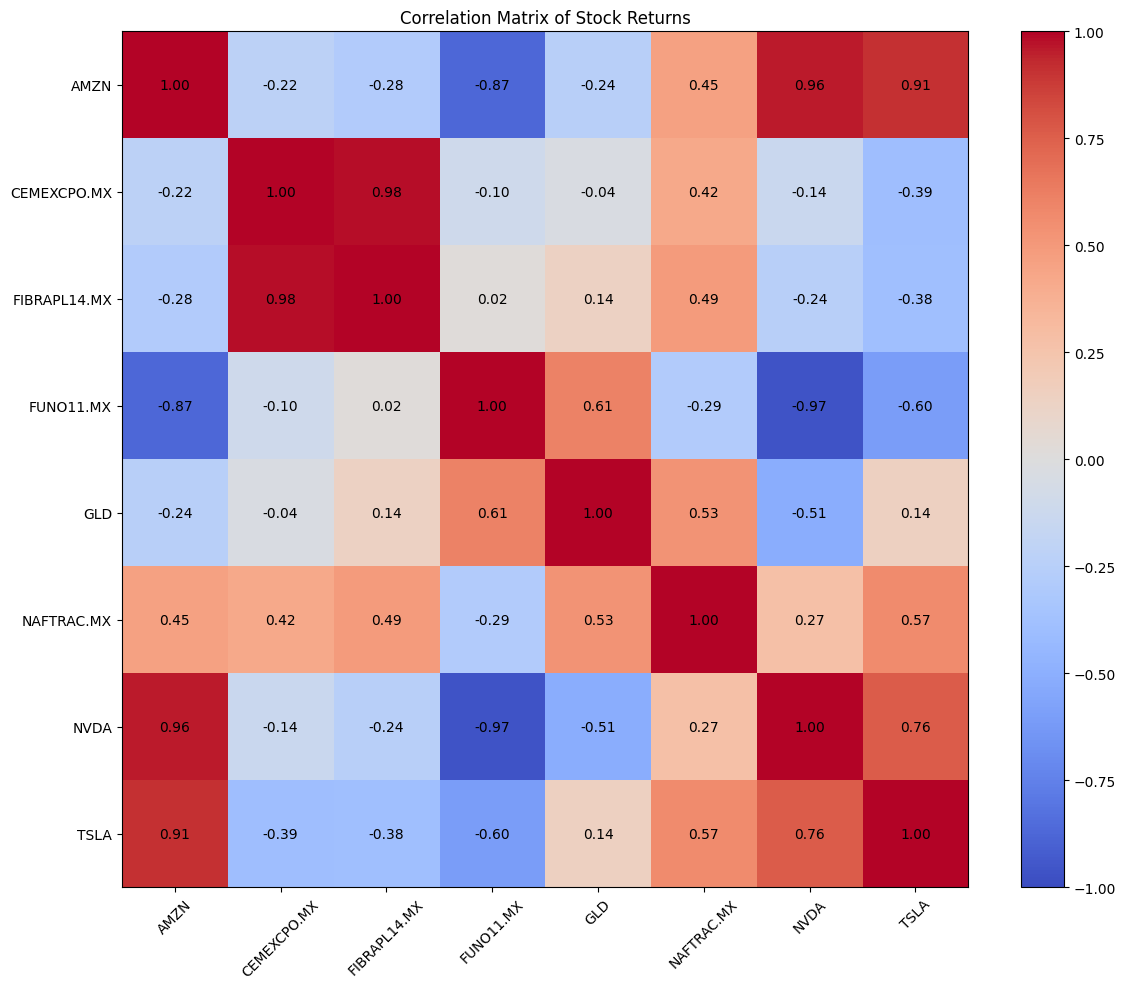

Average correlation between stocks: 0.070


In [17]:
plt.figure(figsize=(12, 10))
im = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im)

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center')
# Set ticks and labels
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

plt.title('Correlation Matrix of Stock Returns')
plt.tight_layout()
plt.show()

# Calculate average correlation
avg_correlation = (correlation_matrix.sum().sum() - len(correlation_matrix)) / (len(correlation_matrix) * (len(correlation_matrix) - 1))
print(f"Average correlation between stocks: {avg_correlation:.3f}")

## Principal Component Analysis

In [18]:

scaler = StandardScaler()
returns_scaled = scaler.fit_transform(data)

pca = PCA()
pca_result = scaler.fit_transform(data)

pca_df = pd.DataFrame(
    pca_result,
    columns=[f'PC{i+1}' for i in range(len(data.columns))]
)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.747527,-1.686633,-1.700365,-0.213501,-0.122943,-0.552275,0.622902,0.952870
1,-1.609649,0.194479,0.399197,1.691503,1.003857,-0.377236,-1.725859,-1.214702
2,0.920247,0.791817,0.877387,-0.716780,0.697337,1.713893,0.663612,1.020371
3,-0.058125,0.700338,0.423781,-0.761223,-1.578251,-0.784383,0.439346,-0.758539


In [19]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot: Cumulative Explained Variance (excluding SPX)')
plt.grid(True)
plt.show()

# Print explained variance for first 3 components
print("Explained variance ratio for first 3 components (excluding SPX):")
for i, ratio in enumerate(pca.explained_variance_ratio_[:3]):
    print(f"PC{i+1}: {ratio:.3f}")

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

<Figure size 1000x600 with 0 Axes>

In [21]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  With sparse inputs, the ARPACK implementation of the truncated SVD can be
 |  used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
 |  may consider :class:`TruncatedSVD` where the data are not centered.
 